## **Data Loading and Initial Exploration**

In [1]:
# Importing the necessary Python Libraries and Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# We load the specific file for Phase 1 as per the project brief.
dataset = pd.read_csv('structured_data.csv')

In [3]:
dataset

,employee_id,tasks_completed,average_task_quality,projects_led,client_satisfaction_score,hours_worked,deadline_met_score,innovation_score,efficiency_score,performance_rating
0,1001,37,6,0,67,34,5,1,7,Low
1,1002,55,5,0,66,45,6,7,6,Low
2,1003,28,7,3,60,49,5,2,9,Low
3,1004,29,7,0,82,33,5,6,9,Medium
4,1005,26,7,2,88,49,5,2,5,Low
...,...,...,...,...,...,...,...,...,...,...
4995,5996,46,7,3,53,34,7,7,7,High
4996,5997,24,5,1,58,31,7,8,9,Low
4997,5998,24,9,3,86,38,7,4,6,High
4998,5999,35,8,0,86,38,6,1,7,Medium


In [4]:
# Displaying Size of the dataset

print(f"Dataset Shape: {dataset.shape}")
print(f"Number of Rows: {dataset.shape[0]}")
print(f"Number of Columns: {dataset.shape[1]}")

Dataset Shape: (5000, 10)
Number of Rows: 5000
Number of Columns: 10


In [5]:
# Display the column names
print("\nColumn Names:")
print(dataset.columns.tolist())


Column Names:
['employee_id', 'tasks_completed', 'average_task_quality', 'projects_led', 'client_satisfaction_score', 'hours_worked', 'deadline_met_score', 'innovation_score', 'efficiency_score', 'performance_rating']


In [6]:
# Display the data types
print("\nData Types:")
print(dataset.dtypes)


Data Types:
employee_id                   int64
tasks_completed               int64
average_task_quality          int64
projects_led                  int64
client_satisfaction_score     int64
hours_worked                  int64
deadline_met_score            int64
innovation_score              int64
efficiency_score              int64
performance_rating           object
dtype: object


In [7]:
# Descriptive statistics of dataset(structured_data.csv file)
dataset.describe( )

,employee_id,tasks_completed,average_task_quality,projects_led,client_satisfaction_score,hours_worked,deadline_met_score,innovation_score,efficiency_score
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,3500.500000,39.788600,6.98640,1.956400,74.383200,39.431200,7.015600,4.96380,6.992400
std,1443.520003,11.693505,1.42247,1.405309,14.539375,5.729139,1.417942,2.58198,1.407245
min,1001.000000,20.000000,5.00000,0.000000,50.000000,30.000000,5.000000,1.00000,5.000000
25%,2250.750000,30.000000,6.00000,1.000000,62.000000,34.000000,6.000000,3.00000,6.000000
50%,3500.500000,40.000000,7.00000,2.000000,74.000000,39.000000,7.000000,5.00000,7.000000
75%,4750.250000,50.000000,8.00000,3.000000,87.000000,44.000000,8.000000,7.00000,8.000000
max,6000.000000,59.000000,9.00000,4.000000,99.000000,49.000000,9.000000,9.00000,9.000000


In [8]:
# Standard Missing Value Check
# Rationale: .isnull().sum() identifies standard NumPy/Pandas null types (NaN/None).
dataset.isnull().sum()

,0
employee_id,0
tasks_completed,0
average_task_quality,0
projects_led,0
client_satisfaction_score,0
hours_worked,0
deadline_met_score,0
innovation_score,0
efficiency_score,0
performance_rating,0


In [9]:
# Duplicate Row Check
dataset.duplicated().sum()

np.int64(0)

In [10]:
# Employee_id verification
missing_values = f"The number of missing values in the employee_id column: {dataset['employee_id'].isnull().sum()}"
print(missing_values)
number_of_rows = f"The number of values in the employee_id column: {dataset['employee_id'].count()}"
print(number_of_rows)
distinct_values = f"The employee_id contains distinct values: {dataset['employee_id'].is_unique}"
print(distinct_values)

The number of missing values in the employee_id column: 0
The number of values in the employee_id column: 5000
The employee_id contains distinct values: True


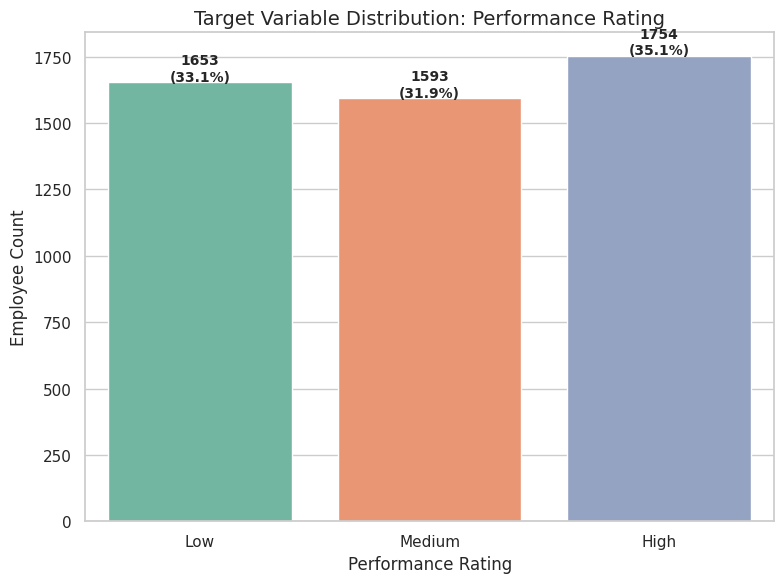

In [11]:

# Configure Plotting Aesthetics
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Logical ordering for ordinal categorical data
class_order = ['Low', 'Medium', 'High']

# Generate Count Plot
# Rationale: Countplot provides a direct visual comparison of class frequencies.
ax = sns.countplot(x='performance_rating', data=dataset, order=class_order, palette='Set2', hue='performance_rating', legend=False)

# Adding Titles and Labels
plt.title('Target Variable Distribution: Performance Rating', fontsize=14)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)

# Annotation Rationale:
# Displaying both raw counts and percentages on the plot helps quickly identify
# potential class imbalance issues without needing a separate table.
for i, p in enumerate(ax.patches):
    count = dataset['performance_rating'].value_counts()[class_order[i]]
    pct = (count / len(dataset)) * 100
    ax.annotate(f'{count}\n({pct:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('performance_rating_distribution.png')

In [12]:
# Exploratory Data Analysis (EDA)
# Rationale: Understanding the target distribution is critical. If classes are imbalanced, accuracy is misleading, and we must use Stratified splitting.
print("Target Class Distribution:\n", dataset['performance_rating'].value_counts(normalize=True))
dataset['performance_rating'].value_counts(normalize=False)

Target Class Distribution:
 performance_rating
High      0.3508
Low       0.3306
Medium    0.3186
Name: proportion, dtype: float64


,count
performance_rating,
High,1754
Low,1653
Medium,1593


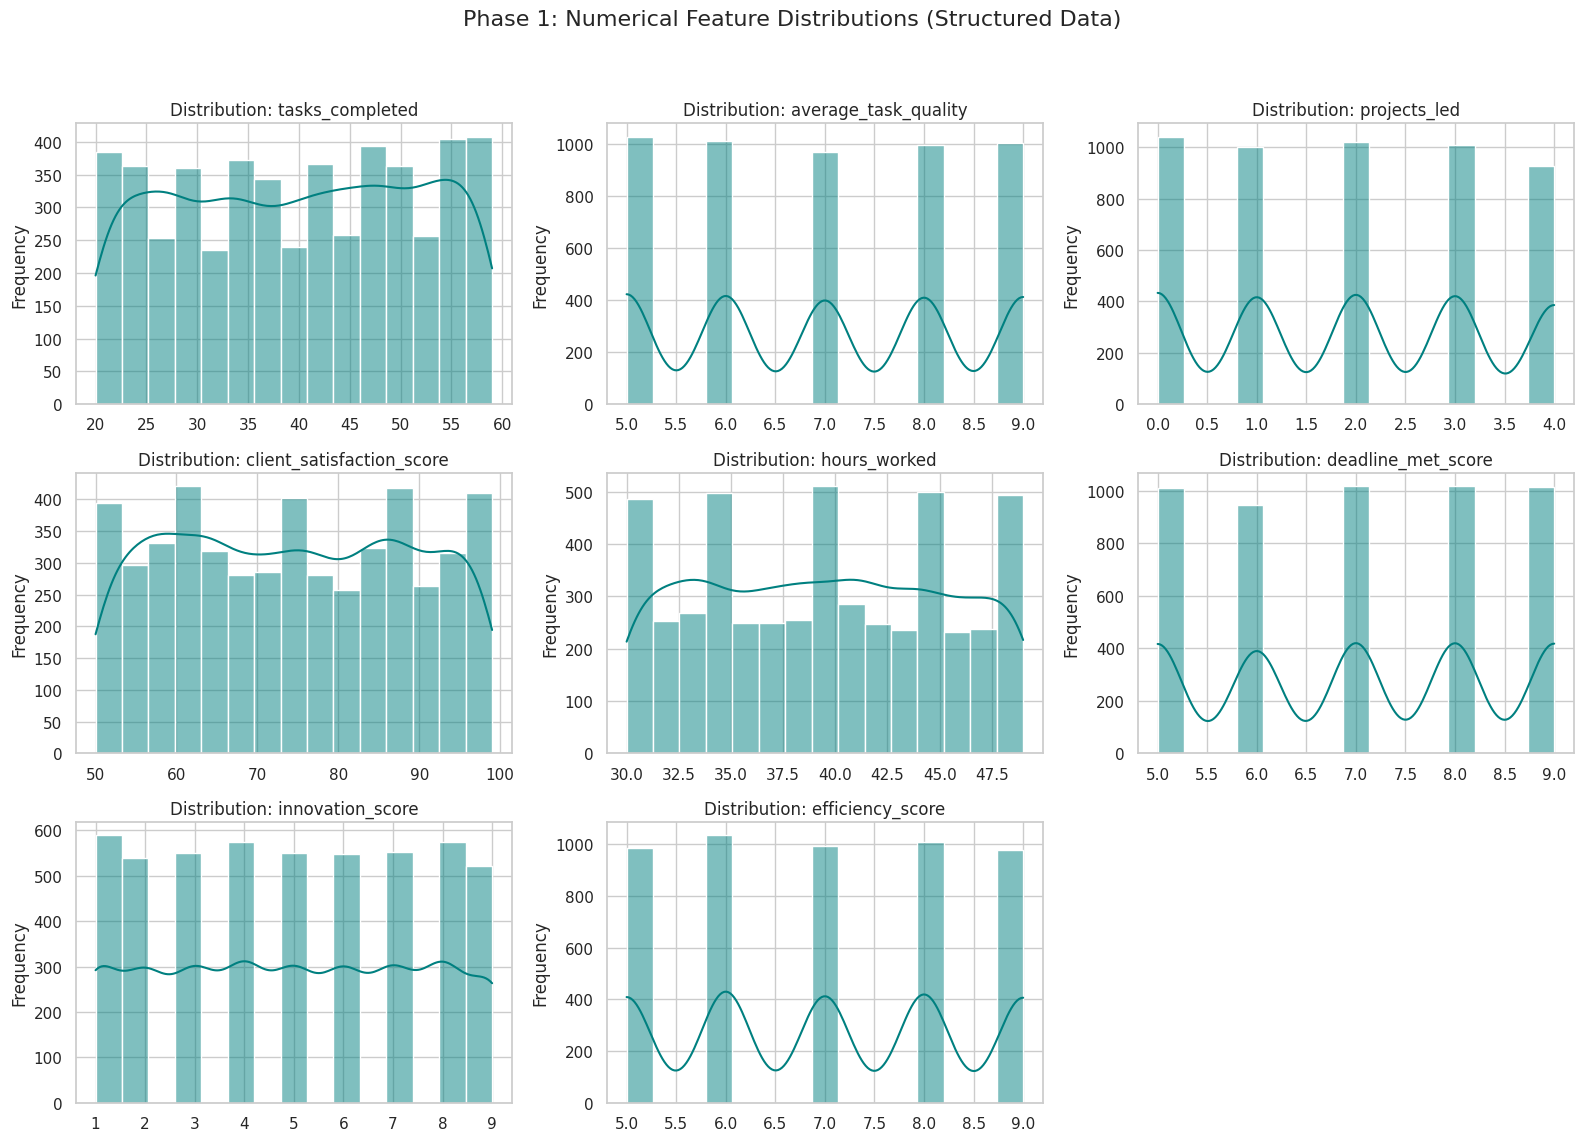

In [13]:
# Filter for numerical features only (excluding employee_id which is just an identifier column)
numerical_features = [
    'tasks_completed', 'average_task_quality', 'projects_led',
    'client_satisfaction_score', 'hours_worked', 'deadline_met_score',
    'innovation_score', 'efficiency_score'
]

# Visaualization of numerical features in histograms with KDE (Kernel Density Estimate).

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(dataset[col], kde=True, color='teal', bins=15)
    plt.title(f'Distribution: {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.suptitle('Phase 1: Numerical Feature Distributions (Structured Data)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('structured_data_histograms.png')

In EDA: We exclude it so that our visualizations focus on variables that actually have density and variance (like efficiency_score).

In Modeling: We exclude it to force the algorithm to find patterns in behavioral and quantitative metrics that will generalize to future employees.

tasks_completed: 0 outliers found
average_task_quality: 0 outliers found
projects_led: 0 outliers found
client_satisfaction_score: 0 outliers found
hours_worked: 0 outliers found
deadline_met_score: 0 outliers found
innovation_score: 0 outliers found
efficiency_score: 0 outliers found


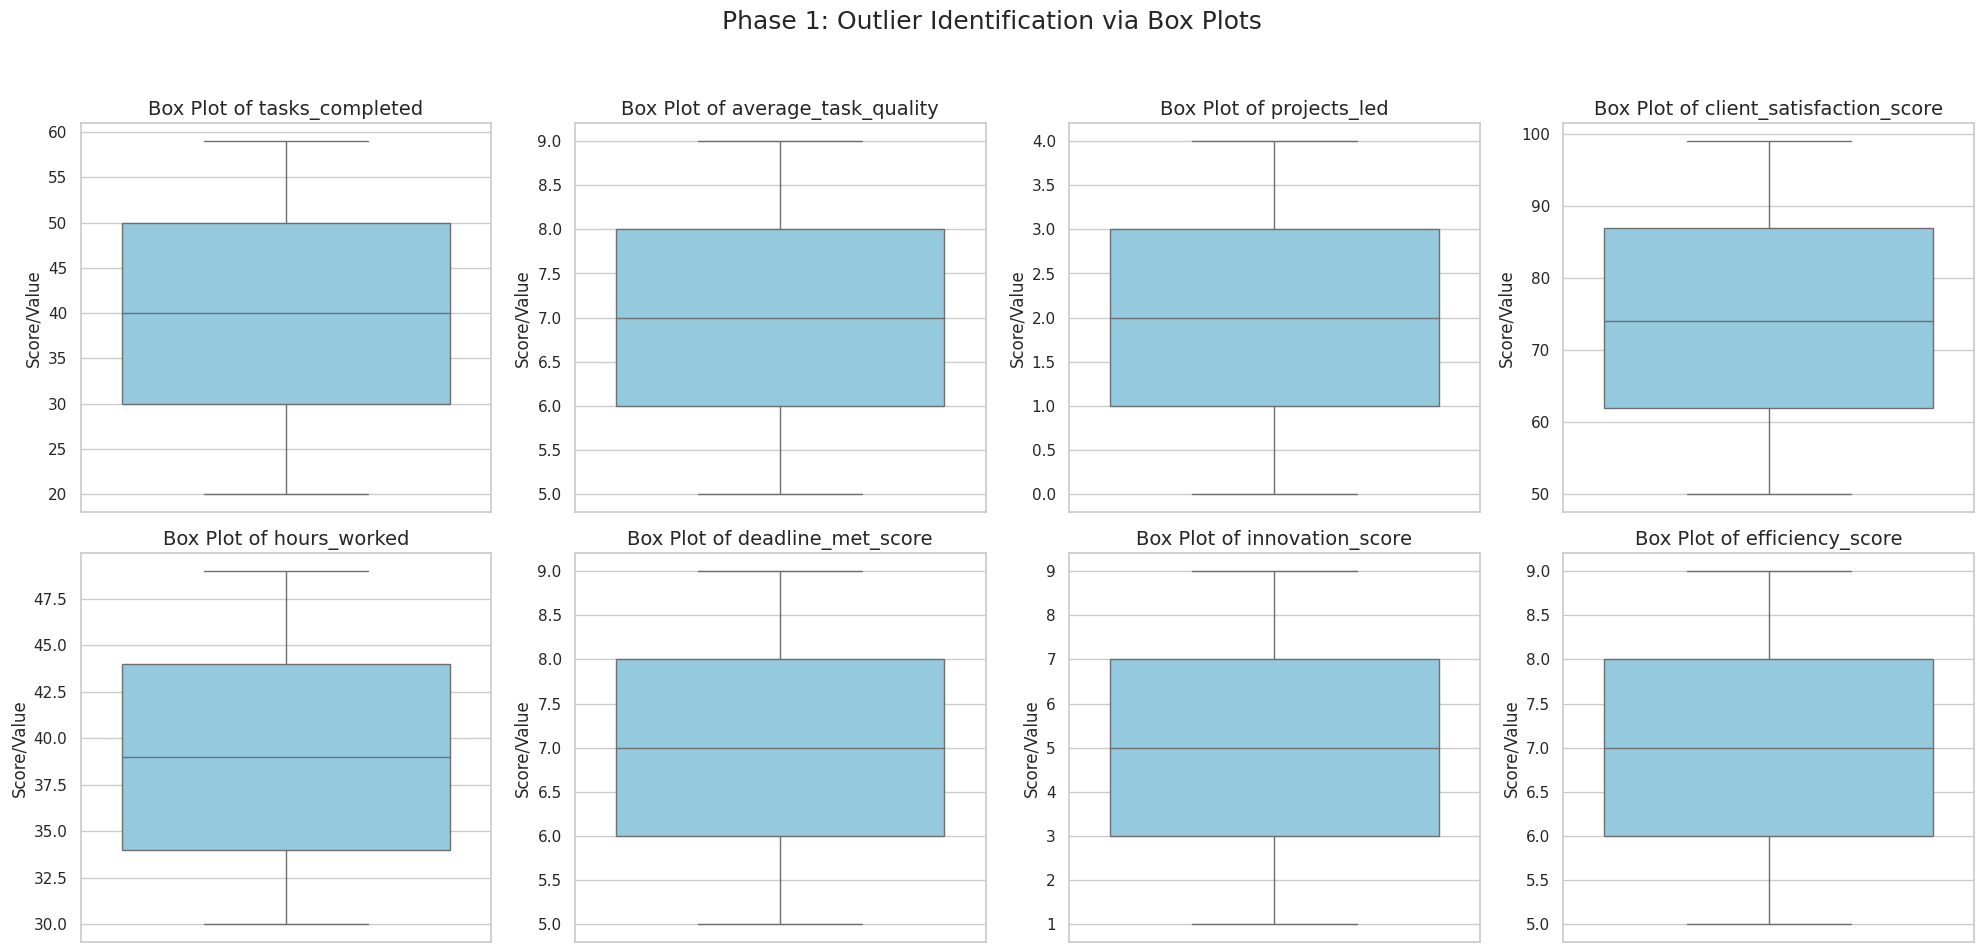

In [14]:
# Select numerical columns (excluding employee_id as it is an identifier)
numerical_cols = [
    'tasks_completed', 'average_task_quality', 'projects_led',
    'client_satisfaction_score', 'hours_worked', 'deadline_met_score',
    'innovation_score', 'efficiency_score'
]

# Visualization Setup
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    # Rationale: flierprops highlights outliers with a red 'x' for better visibility.
    sns.boxplot(y=dataset[col], color='skyblue',
                flierprops={"marker": "x", "markersize": 10, "markerfacecolor": "red"})
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel('Score/Value')

plt.suptitle('Phase 1: Outlier Identification via Box Plots', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('structured_data_boxplots.png')

# 4. Programmatic Outlier Detection (IQR Method)
# Rationale: While plots are visual, we need quantitative confirmation to decide on treatment.
for col in numerical_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers found")

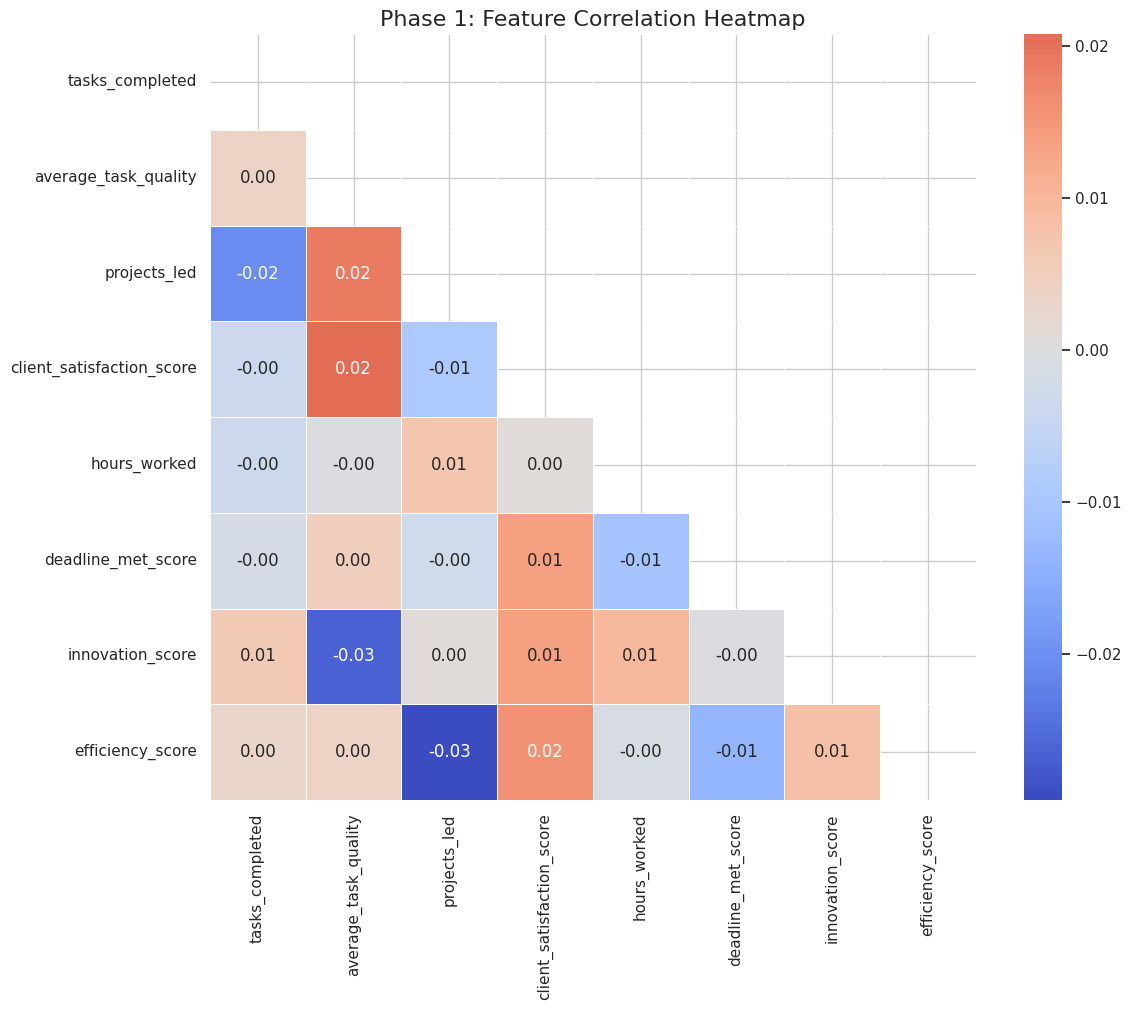

In [15]:
# Feature Selection
# Rationale: We exclude 'employee_id' (identifier) and 'performance_rating' (categorical target)
# to focus strictly on the interaction between independent variables.
features = dataset.drop(columns=['employee_id', 'performance_rating'])

# Calculate Pearson Correlation
# Rationale: Pearson's 'r' measures the linear relationship between variables from -1 to 1.
corr_matrix = features.corr()

# Visualization Setup
plt.figure(figsize=(12, 10))

# Masking the upper triangle
# Rationale: Since the correlation matrix is symmetric, the upper triangle is redundant.
# Masking it makes the heatmap easier for stakeholders to read.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate Heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('Phase 1: Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png')

**Observations**



   - The dataset is perfectly clean: **0 missing values**, **0 duplicate rows**, and **5,000 unique employee_id** values across all records.  
   - All predictive features are numeric (integers or floats), with no categorical variables except the target (`performance_rating`).  
   - The target variable is **perfectly balanced** (~33.3% each for Low, Medium, High), eliminating the need for class re-weighting or oversampling techniques.




# **Data Preprocessing**

In [16]:
# Create the new feature 'quality_per_task'
# Rationale: This feature captures the average quality attributed to each task completed,
# potentially highlighting efficiency and thoroughness.
dataset['quality_per_task'] = dataset['average_task_quality'] / dataset['tasks_completed']

# Display the first few rows to verify the new column
print("Dataset head with new 'quality_per_task' column:")
display(dataset.head())

Dataset head with new 'quality_per_task' column:


,employee_id,tasks_completed,average_task_quality,projects_led,client_satisfaction_score,hours_worked,deadline_met_score,innovation_score,efficiency_score,performance_rating,quality_per_task
0,1001,37,6,0,67,34,5,1,7,Low,0.162162
1,1002,55,5,0,66,45,6,7,6,Low,0.090909
2,1003,28,7,3,60,49,5,2,9,Low,0.250000
3,1004,29,7,0,82,33,5,6,9,Medium,0.241379
4,1005,26,7,2,88,49,5,2,5,Low,0.269231


In [17]:
rating_map = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply to your dataframe
dataset['performance_rating_encoded'] = dataset['performance_rating'].map(rating_map)

In [18]:
dataset.head(10)

,employee_id,tasks_completed,average_task_quality,projects_led,client_satisfaction_score,hours_worked,deadline_met_score,innovation_score,efficiency_score,performance_rating,quality_per_task,performance_rating_encoded
0,1001,37,6,0,67,34,5,1,7,Low,0.162162,0
1,1002,55,5,0,66,45,6,7,6,Low,0.090909,0
2,1003,28,7,3,60,49,5,2,9,Low,0.250000,0
3,1004,29,7,0,82,33,5,6,9,Medium,0.241379,1
4,1005,26,7,2,88,49,5,2,5,Low,0.269231,0
5,1006,35,5,4,56,46,8,2,8,Low,0.142857,0
6,1007,51,8,0,57,33,6,9,5,Medium,0.156863,1
7,1008,22,5,2,61,44,9,6,7,Low,0.227273,0
8,1009,51,7,0,69,46,9,9,8,Medium,0.137255,1
9,1010,53,6,4,73,40,7,3,9,High,0.113208,2


In [19]:
# Get the current list of columns
columns = dataset.columns.tolist()

# Find the index of 'quality_per_task' and 'performance_rating'
idx_quality_per_task = columns.index('quality_per_task')
idx_performance_rating = columns.index('performance_rating')

# Swap the column names in the list
columns[idx_quality_per_task], columns[idx_performance_rating] = columns[idx_performance_rating], columns[idx_quality_per_task]

# Reindex the DataFrame with the new column order and ensure it's a copy
dataset = dataset[columns].copy()

print("Columns swapped successfully. Displaying updated DataFrame head:")
display(dataset.head())

Columns swapped successfully. Displaying updated DataFrame head:


,employee_id,tasks_completed,average_task_quality,projects_led,client_satisfaction_score,hours_worked,deadline_met_score,innovation_score,efficiency_score,quality_per_task,performance_rating,performance_rating_encoded
0,1001,37,6,0,67,34,5,1,7,0.162162,Low,0
1,1002,55,5,0,66,45,6,7,6,0.090909,Low,0
2,1003,28,7,3,60,49,5,2,9,0.250000,Low,0
3,1004,29,7,0,82,33,5,6,9,0.241379,Medium,1
4,1005,26,7,2,88,49,5,2,5,0.269231,Low,0


**Reasons for Feature Engineering**

  - The engineered feature `quality_per_task` = `average_task_quality / tasks_completed` adds meaningful signal by capturing **quality per unit of output**.  
   - This helps differentiate between high-volume/low-quality and low-volume/high-quality contributors — a distinction that raw counts alone cannot capture.

# **Train Test Split**

In [20]:
# Splitting the dataset according to the 80% and 20% ratio.

X = dataset.iloc[:, 1 :-2].values
y = dataset.iloc[:, -1].values

In [21]:
X

array([[37.        ,  6.        ,  0.        , ...,  1.        ,
         7.        ,  0.16216216],
       [55.        ,  5.        ,  0.        , ...,  7.        ,
         6.        ,  0.09090909],
       [28.        ,  7.        ,  3.        , ...,  2.        ,
         9.        ,  0.25      ],
       ...,
       [24.        ,  9.        ,  3.        , ...,  4.        ,
         6.        ,  0.375     ],
       [35.        ,  8.        ,  0.        , ...,  1.        ,
         7.        ,  0.22857143],
       [50.        ,  5.        ,  0.        , ...,  1.        ,
         9.        ,  0.1       ]])

In [22]:
y

array([0, 0, 0, ..., 2, 1, 0])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42, stratify=y)

In [24]:
X_train.shape

(4000, 9)

In [25]:
X_test.shape

(1000, 9)

In [26]:
y_train.shape

(4000,)

In [27]:
y_test.shape

(1000,)

In [28]:
# Calculate the percentage of class distribution in the target variable (performance_rating).
train_series = pd.Series(y_train)
test_series = pd.Series(y_test)
original_dist = dataset['performance_rating_encoded'].value_counts(normalize=True) *100
train_dist = train_series.value_counts(normalize = True) * 100
test_dist = test_series.value_counts(normalize = True) * 100
print("--- Original Distribution ---")
print(original_dist)
print("--- Training Set Distribution ---")
print(train_dist)
print("--- Testing Set Distribution ---")
print(test_dist)

--- Original Distribution ---
performance_rating_encoded
2    35.08
0    33.06
1    31.86
Name: proportion, dtype: float64
--- Training Set Distribution ---
2    35.075
0    33.050
1    31.875
Name: proportion, dtype: float64
--- Testing Set Distribution ---
2    35.1
0    33.1
1    31.8
Name: proportion, dtype: float64


# **Model Building**

In [29]:
# Applying Scaling to the X train and X test

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[ 1.39364641, -0.6992759 , -1.39123137, ...,  1.174233  ,
        -1.4154876 , -1.13985837],
       [-0.74621111, -1.40118396, -0.67814507, ...,  0.78800391,
        -0.70525799, -0.43233037],
       [-1.34537122, -0.6992759 ,  0.74802753, ..., -0.75691246,
         0.00497161,  0.72681124],
       ...,
       [-1.34537122, -0.6992759 , -1.39123137, ...,  0.01554572,
         1.42543081,  0.72681124],
       [-1.25977692,  0.70454022,  1.46111383, ...,  0.01554572,
         0.00497161,  1.64147934],
       [-0.14705101,  1.40644828, -1.39123137, ...,  1.56046209,
         1.42543081,  0.55488114]])

In [31]:
X_test

array([[-1.17418262,  1.40644828,  0.74802753, ...,  0.78800391,
         1.42543081,  1.98322347],
       [ 1.39364641, -1.40118396, -1.39123137, ...,  1.174233  ,
        -0.70525799, -1.37319207],
       [-0.83180541,  1.40644828,  1.46111383, ...,  0.78800391,
        -0.70525799,  1.3801456 ],
       ...,
       [ 1.2224578 ,  0.70454022,  0.74802753, ...,  0.78800391,
        -0.70525799, -0.60405505],
       [-0.66061681, -1.40118396,  1.46111383, ..., -1.14314156,
         0.00497161, -0.49819069],
       [-1.43096552, -1.40118396,  1.46111383, ...,  0.78800391,
         0.00497161,  0.30072361]])

In [32]:
# Model Training

classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# 1. Make predictions on the training set
# Rationale: This helps to evaluate how well the model has learned the training data.
y_pred_train = classifier.predict(X_train)

# 2. Make predictions on the test set
# Rationale: This is the primary evaluation of the model's generalization ability on unseen data.
y_pred_test = classifier.predict(X_test)

print("Predictions on training set (first 5):", y_pred_train[:5])
print("Predictions on test set (first 5):", y_pred_test[:5])

Predictions on training set (first 5): [1 0 0 1 2]
Predictions on test set (first 5): [2 1 2 0 1]


# **Model Evaluation**

Training Accuracy: 1.0000
Test Accuracy: 0.7660

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

     Class 0       0.79      0.80      0.80       331
     Class 1       0.63      0.65      0.64       318
     Class 2       0.87      0.83      0.85       351

    accuracy                           0.77      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.77      0.77      0.77      1000



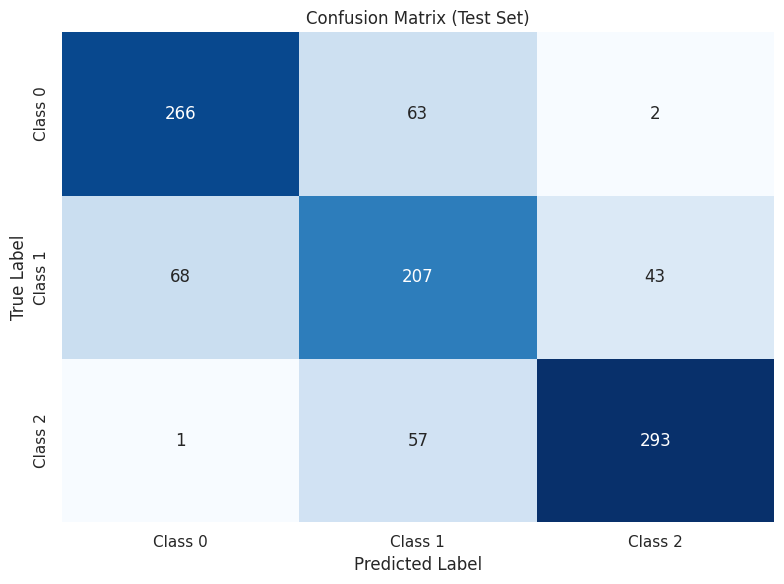

In [34]:
# 1. Calculate Accuracy for Training and Test Sets
# Rationale: Training accuracy shows how well the model learned the training data,
# while test accuracy indicates its generalization ability.

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 2. Build Classification Report
# Rationale: The classification report provides precision, recall, and F1-score
# for each class, along with support and macro/weighted averages, offering a comprehensive view.

# Determine the class names based on the label_interpretation from earlier steps
# Assuming label_interpretation is available and correctly maps numerical labels to class names
# If not, a generic target_names list will be used.

# Check if label_interpretation (from encoding step) is available
if 'label_interpretation' in globals():
    # Sort by key to ensure correct order (0, 1, 2) corresponds to (Low, Medium, High)
    target_names = [label_interpretation[k] for k in sorted(label_interpretation.keys())]
else:
    # Fallback if label_interpretation is not defined
    target_names = ['Class 0', 'Class 1', 'Class 2'] # Generic names if original mapping is unavailable

print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred_test, target_names=target_names))

# 3. Build and Visualize Confusion Matrix as Heatmap
# Rationale: A confusion matrix visually shows the number of correct and incorrect
# predictions for each class, providing insight into misclassifications.

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


In [35]:
# Viewing Confusion Metrix

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[266  63   2]
 [ 68 207  43]
 [  1  57 293]]


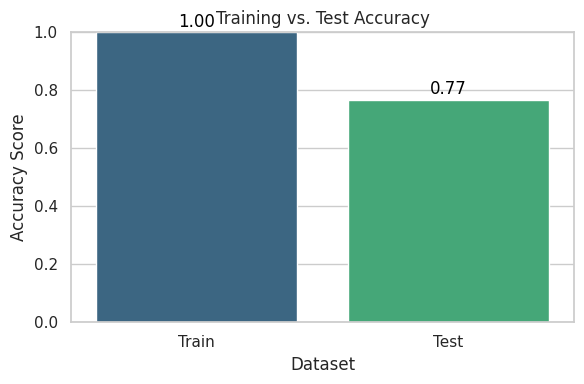

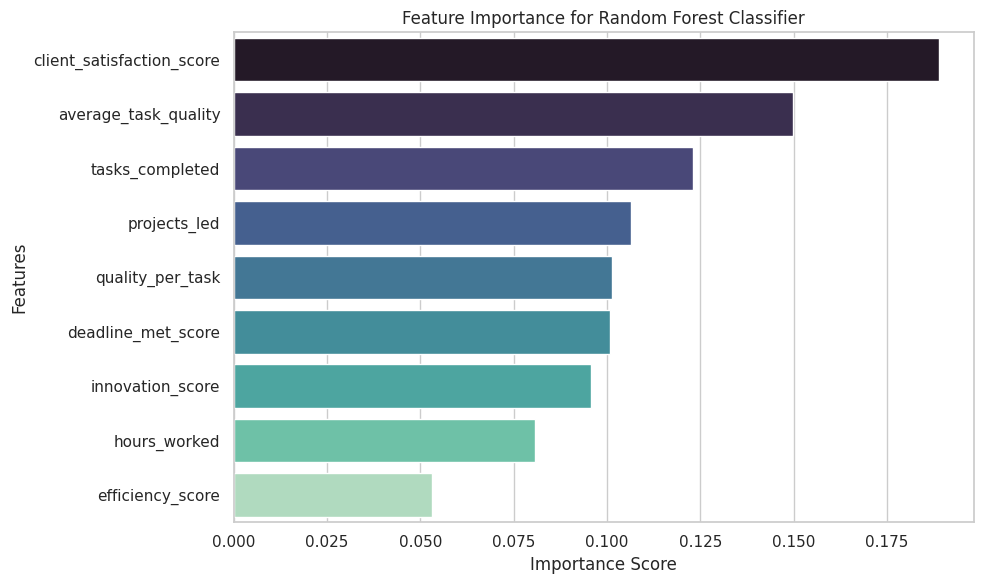

In [36]:
# 1. Bar Chart: Training vs. Test Accuracy
# Rationale: This plot provides a quick visual comparison of model performance on seen vs. unseen data.
accuracy_scores = {'Dataset': ['Train', 'Test'], 'Accuracy': [train_accuracy, test_accuracy]}
accuracy_df = pd.DataFrame(accuracy_scores)

plt.figure(figsize=(6, 4))
sns.barplot(x='Dataset', y='Accuracy', data=accuracy_df, palette='viridis', hue='Dataset', legend=False)
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.title('Training vs. Test Accuracy')
plt.ylabel('Accuracy Score')

# Add text labels for accuracy values
for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.02, f"{row['Accuracy']:.2f}", color='black', ha="center")

plt.tight_layout()
plt.savefig('train_test_accuracy_bar_chart.png')
plt.show()


# 2. Feature Importance Plot
# Rationale: Understanding feature importance helps in identifying key drivers
# for employee performance and provides insights for business decisions.

# Get feature importances from the trained classifier
importances = classifier.feature_importances_

# Get feature names (excluding employee_id and performance_rating from the original dataset)
# We need to ensure the order of feature names matches the order of features in X_train
# The original features DataFrame was created in cell hY_Iba5JnQJm, and its columns are relevant.
# X = dataset.iloc[:, 1 :-2].values; so we need to get columns from original dataset
# dropping 'employee_id', 'performance_rating', and 'performance_rating_encoded'

# Re-create feature names list based on how X was constructed
original_feature_cols = dataset.drop(columns=['employee_id', 'performance_rating', 'performance_rating_encoded']).columns

feat_importances = pd.Series(importances, index=original_feature_cols)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette='mako', hue=feat_importances.index, legend=False)
plt.title('Feature Importance for Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance_plot.png')
plt.show()

In [37]:
# Save the trained Random Forest model
filename = 'random_forest_classifier_model.pkl'

with open(filename, 'wb') as f:
    pickle.dump(classifier, f)

print(f"Random Forest model successfully saved as {filename}")

Random Forest model successfully saved as random_forest_classifier_model.pkl
